# Define Random Variables

Определим две дискретные СВ в виде словаря:

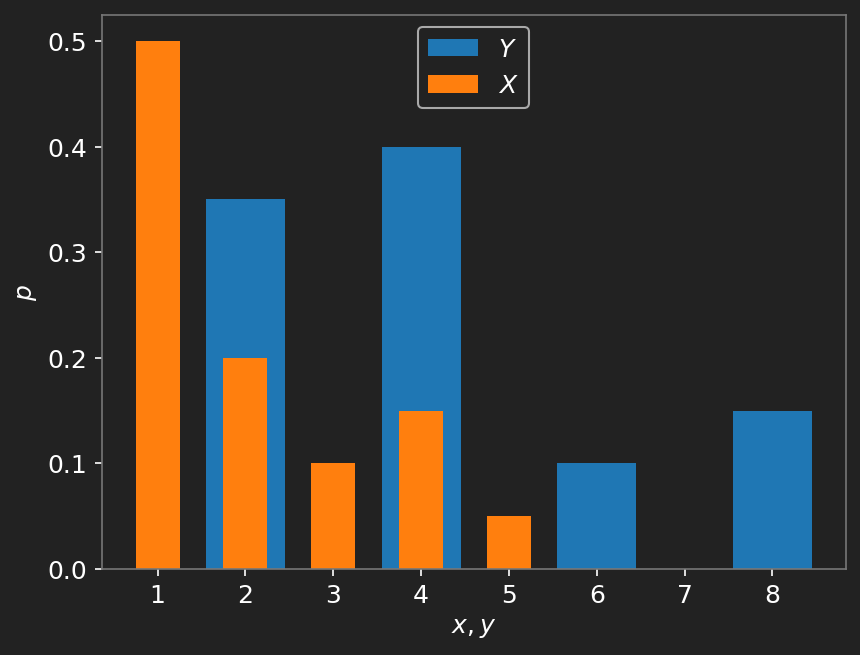

In [26]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ordevoir-dark")

X = {   "xs": np.array([1., 2., 3., 4.,  5.]),
        "ps": np.array([.5, .2, .1, .15, .05]) }

Y = {   "xs": np.array([2.,  4.,  6., 8.]),
        "ps": np.array([.35, .4, .1, .15]) }

plt.bar(Y["xs"], Y["ps"], width=0.9, label="$Y$")
plt.bar(X["xs"], X["ps"], width=0.5, label="$X$")
plt.legend(loc="upper center")
plt.xlabel("$x, y$")
plt.ylabel("$p$")
plt.show()

In [27]:
def E(A):   return np.sum(A["xs"] * A["ps"])
def Var(A): return np.sum(((A["xs"] - E(A))**2) * A["ps"])
def std(A): return np.sqrt(Var(A))

print(f"{E(X) = :.2f}, {Var(X) = :.2f}, {std(X) = :.2f}")
print(f"{E(Y) = :.2f}, {Var(Y) = :.2f}, {std(Y) = :.2f}")

E(X) = 2.05, Var(X) = 1.65, std(X) = 1.28
E(Y) = 4.10, Var(Y) = 4.19, std(Y) = 2.05


# Сумма случайных величин

Функция `addRV()` принимает два словаря, содержащие распределения, и возвращает их cумму

In [28]:
def addRV(dist_1, dist_2):
    
    new_xs, new_ps = [], []
    for x1, p1 in zip(dist_1["xs"], dist_1["ps"]):
        for x2, p2 in zip(dist_2["xs"], dist_2["ps"]):
            new_xs.append(x1+x2)
            new_ps.append(p1*p2)

    ordered = sorted(list(zip(new_xs, new_ps)), key=lambda x: x[0])
    
    new_xs, new_ps = [], []
    for x, p in ordered:
        if x in new_xs:
            new_ps[-1] += p
        else:
            new_xs.append(x)
            new_ps.append(p)

    return {"xs": np.array(new_xs), "ps": np.array(new_ps)}

[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.] 1.0


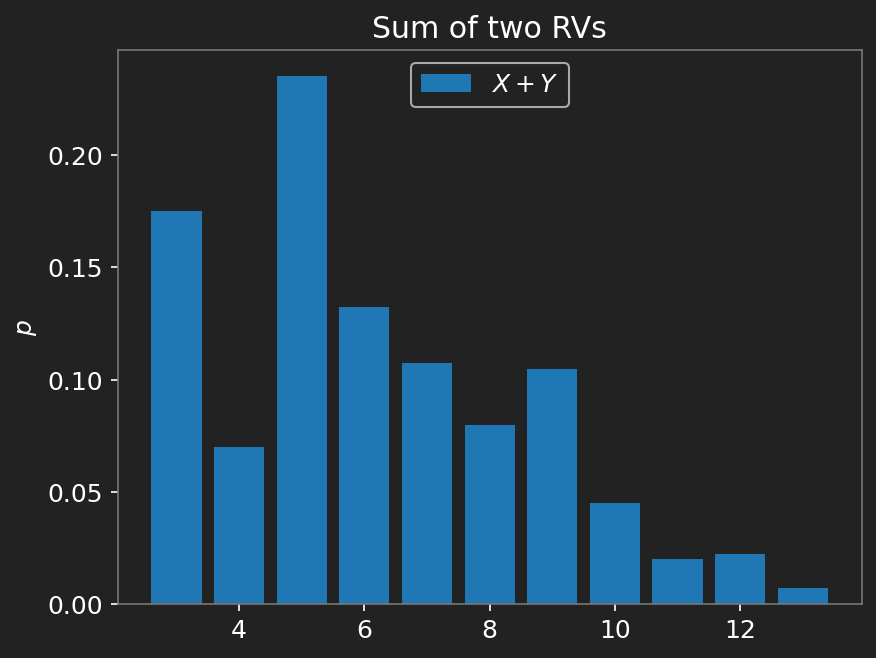

In [29]:
sumRV = addRV(X, Y)
print(sumRV["xs"], sum(sumRV["ps"]))

plt.bar(sumRV["xs"], sumRV["ps"], label="$X + Y$")
plt.legend(loc="upper center")
plt.ylabel("$p$")
plt.title("Sum of two RVs")
plt.show()

In [30]:
print(f"{E(X) = :.2f},\t {Var(X) = :.2f}\t\t{std(X) = :.2f}")
print(f"{E(Y) = :.2f},\t {Var(Y) = :.2f}\t\t{std(Y) = :.2f}")
print(f"{E(sumRV) = :.2f}, {Var(sumRV) = :.2f},\t{std(sumRV) = :.2f}")

E(X) = 2.05,	 Var(X) = 1.65		std(X) = 1.28
E(Y) = 4.10,	 Var(Y) = 4.19		std(Y) = 2.05
E(sumRV) = 6.15, Var(sumRV) = 5.84,	std(sumRV) = 2.42


In [31]:
print(f"{E(X) + E(Y) = :.2f}, {Var(X) + Var(Y) = :.2f}")
print(f"{np.sqrt(std(X)**2 + std(Y)**2) = :.2f}")

E(X) + E(Y) = 6.15, Var(X) + Var(Y) = 5.84
np.sqrt(std(X)**2 + std(Y)**2) = 2.42


# Среднее от случайных величин

## Пример 1

Пусть **подбрасываются две кости**. Случайная величина `mean_two_dices`, которая представляет собой среднее от выпадающих чисел, является средним двух одинаковых случайных величин (`dice`): подбрасывание одной кости:

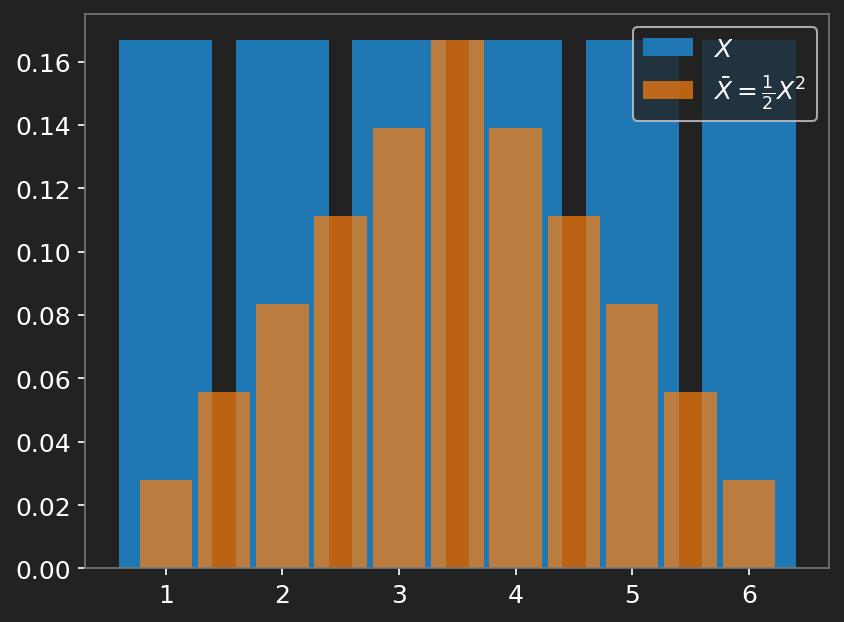

In [32]:
dice = {"xs": np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0]), 
      "ps": np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]) }
mean_two_dices = addRV(dice, dice)
mean_two_dices["xs"] /= 2.0

plt.bar(dice["xs"],dice["ps"], label="$X$")
plt.bar(mean_two_dices["xs"],mean_two_dices["ps"], width=0.45, 
       alpha=0.7, label=r"$\bar{X} = \frac{1}{2}X^2$")
plt.legend()
plt.show()

Всевозможные исходы по-прежнему лежат в диапазоне $[1, 6]$,  но теперь это уже не целочисленные значения $[1. 0, 1.5, 2. 0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]$, и распределение их не равномерное. В данном случае мы имеем пример iid. Среднее от независимых случайных величин стремится к нормальному распределению, в соответствии с центральной предельной теоремой. 

## Пример 2

Поработаем со случайной величиной `X`, определнной выше

In [33]:
X

{'xs': array([1., 2., 3., 4., 5.]),
 'ps': array([0.5 , 0.2 , 0.1 , 0.15, 0.05])}

Напишем функцию, которая возвращает случайную величину, которая является средним от двух случайных велиичин:

In [34]:
def meanRV(RVs: list):
	if len(RVs) == 1: return RVs[0]
	S = addRV(RVs[0], RVs[1])
	for A in RVs[2:]:
		S = addRV(S, A)
	S["xs"] /= len(RVs)
	return S

Среднее от 10 одинаковых случайных величин `X`, (они являются независимыми)

In [35]:
n = 10
mean_X = meanRV([X]*n)
print(f"{X["xs"] = }\n\n{mean_X["xs"] = }")

X["xs"] = array([1., 2., 3., 4., 5.])

mean_X["xs"] = array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. ])


Распределение среднего стремится к нормальному:

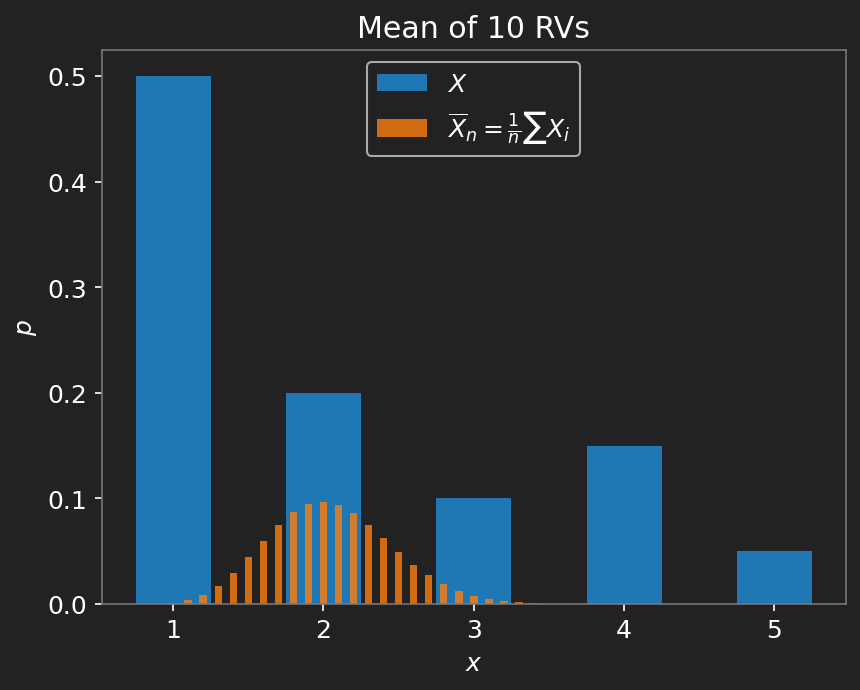

In [36]:
plt.bar(X["xs"], X["ps"], width=0.5, label="$X$")
plt.bar(mean_X["xs"], mean_X["ps"], width=0.05, 
		alpha=0.8, label=r"$\overline{X}_n=\frac{1}{n}\sum X_i $")
plt.legend(loc="upper center")
plt.xlabel("$x$")
plt.ylabel("$p$")
plt.title(f"Mean of {n} RVs")
plt.show()

In [37]:
print(f"{E(X) = :.2f},\t\t{std(X) = :.2f}")
print(f"{E(mean_X) = :.2f},\t{std(mean_X) = :.2f}")

E(X) = 2.05,		std(X) = 1.28
E(mean_X) = 2.05,	std(mean_X) = 0.41


Теперь пойдем статистическим путем. Сгенерируем $m$ раз выборки случайной величины $X$ по $n$ образцов. Получим матрицу $m \times n$. Усредним результаты вдоль вертикали (`axis=1`):

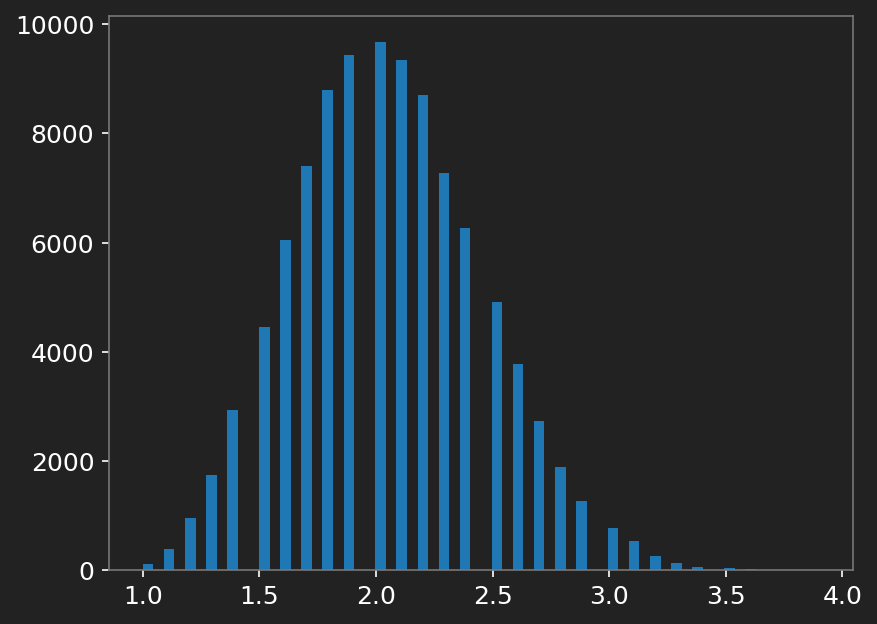

In [38]:
m = 100000
X_samples = np.random.choice(X["xs"], (m, n), p=X["ps"])
X_n_samples = np.mean(X_samples, axis=1)

plt.hist(X_n_samples, 64)
plt.show()

Получим среднее и стандартное отклонение от выборки $\overline X_n$ и сравним теоретическими значениям (в предыдущем коде):

In [39]:
print(f"mean: {X_samples.mean() :.2f}, std: {X_n_samples.std() :.2f}")

mean: 2.05, std: 0.41
